<a href="https://colab.research.google.com/github/bhavanisankardavuluri10/EDA-shopping-trends-analysis-/blob/main/EDA_on_Shopping_trend_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import primary libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Display plots inline (for Jupyter/Colab)
%matplotlib inline


In [2]:
from google.colab import files

uploaded = files.upload()  # Manually upload your file
data = pd.read_excel('shopping_trends_updated.xlsx')
print(data.head())


Saving shopping_trends_updated.xlsx to shopping_trends_updated.xlsx
   Unnamed: 0  Customer ID  Age Gender Item Purchased  Category  \
0           0            1   55   Male         Blouse  Clothing   
1           1            2   19   Male        Sweater  Clothing   
2           2            3   50   Male          Jeans  Clothing   
3           3            4   21   Male        Sandals  Footwear   
4           4            5   45   Male         Blouse  Clothing   

   Purchase Amount (USD)       Location Size      Color  Season  \
0                     53       Kentucky    L       Gray  Winter   
1                     64          Maine    L     Maroon  Winter   
2                     73  Massachusetts    S     Maroon  Spring   
3                     90   Rhode Island    M     Maroon  Spring   
4                     49         Oregon    M  Turquoise  Spring   

   Review Rating Subscription Status  Shipping Type Discount Applied  \
0            3.1                 Yes        Express   

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Size                    3900 non-null   object 
 9   Color                   3900 non-null   object 
 10  Season                  3900 non-null   object 
 11  Review Rating           3900 non-null   float64
 12  Subscription Status     3900 non-null   object 
 13  Shipping Type           3900 non-null   object 
 14  Discount Applied        3900 non-null   

In [4]:
print(data.describe())

        Unnamed: 0  Customer ID          Age  Purchase Amount (USD)  \
count  3900.000000  3900.000000  3900.000000            3900.000000   
mean   1949.500000  1950.500000    44.068462              59.764359   
std    1125.977353  1125.977353    15.207589              23.685392   
min       0.000000     1.000000    18.000000              20.000000   
25%     974.750000   975.750000    31.000000              39.000000   
50%    1949.500000  1950.500000    44.000000              60.000000   
75%    2924.250000  2925.250000    57.000000              81.000000   
max    3899.000000  3900.000000    70.000000             100.000000   

       Review Rating  Previous Purchases  
count    3900.000000         3900.000000  
mean        3.749949           25.351538  
std         0.716223           14.447125  
min         2.500000            1.000000  
25%         3.100000           13.000000  
50%         3.700000           25.000000  
75%         4.400000           38.000000  
max         5.00

In [5]:
print(data.isnull().sum())

Unnamed: 0                0
Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64


In [6]:
print(data.columns)

Index(['Unnamed: 0', 'Customer ID', 'Age', 'Gender', 'Item Purchased',
       'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color',
       'Season', 'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


In [7]:
print(data.iloc[10])

Unnamed: 0                           10
Customer ID                          11
Age                                  53
Gender                             Male
Item Purchased                    Shoes
Category                       Footwear
Purchase Amount (USD)                34
Location                       Arkansas
Size                                  L
Color                            Purple
Season                             Fall
Review Rating                       4.1
Subscription Status                 Yes
Shipping Type              Store Pickup
Discount Applied                    Yes
Promo Code Used                     Yes
Previous Purchases                   26
Payment Method            Bank Transfer
Frequency of Purchases        Bi-Weekly
Name: 10, dtype: object


In [8]:
data = data.dropna()  # Drop rows with missing values
print(f"Shape after dropping missing values: {data.shape}")


Shape after dropping missing values: (3900, 19)


In [9]:
data['Age'] = data['Age'].fillna(18)

In [10]:
# Check column names
print(data.columns)

# Replace 'Category' and 'Sales' with the appropriate column names from your dataset
if 'Category' in data.columns and 'Sales' in data.columns:
    # Group by category and sum the sales
    category_sales = data.groupby('Category')['Sales'].sum().reset_index()

    # Sort the categories by total sales
    category_sales = category_sales.sort_values(by='Sales', ascending=False)

    # Visualization using Seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Category', y='Sales', data=category_sales, palette='viridis')
    plt.title('Total Sales by Category', fontsize=16)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Total Sales', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Ensure your dataset has 'Category' and 'Sales' columns!")


Index(['Unnamed: 0', 'Customer ID', 'Age', 'Gender', 'Item Purchased',
       'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color',
       'Season', 'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')
Ensure your dataset has 'Category' and 'Sales' columns!


In [11]:
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
data ['Age'].value_counts()

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


In [13]:
data ['Age'].mean()

44.06846153846154

In [14]:
data ['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
data ['Age_category'] = pd.cut(data ['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )

In [16]:
fig = px.histogram(data , y = 'Age' , x = 'Age_category')
fig.show()

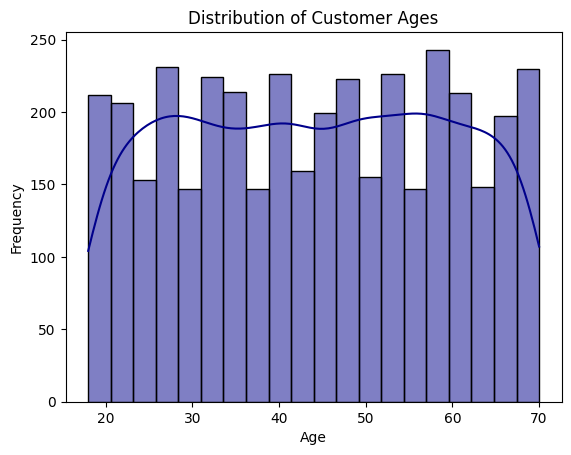

In [17]:
# Replace 'Age' with the actual column name for customer ages in your dataset
sns.histplot(data['Age'], kde=True, bins=20, color='#00008B')
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [18]:
print(data.columns)


Index(['Unnamed: 0', 'Customer ID', 'Age', 'Gender', 'Item Purchased',
       'Category', 'Purchase Amount (USD)', 'Location', 'Size', 'Color',
       'Season', 'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')


<ipython-input-19-715794c543e2>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




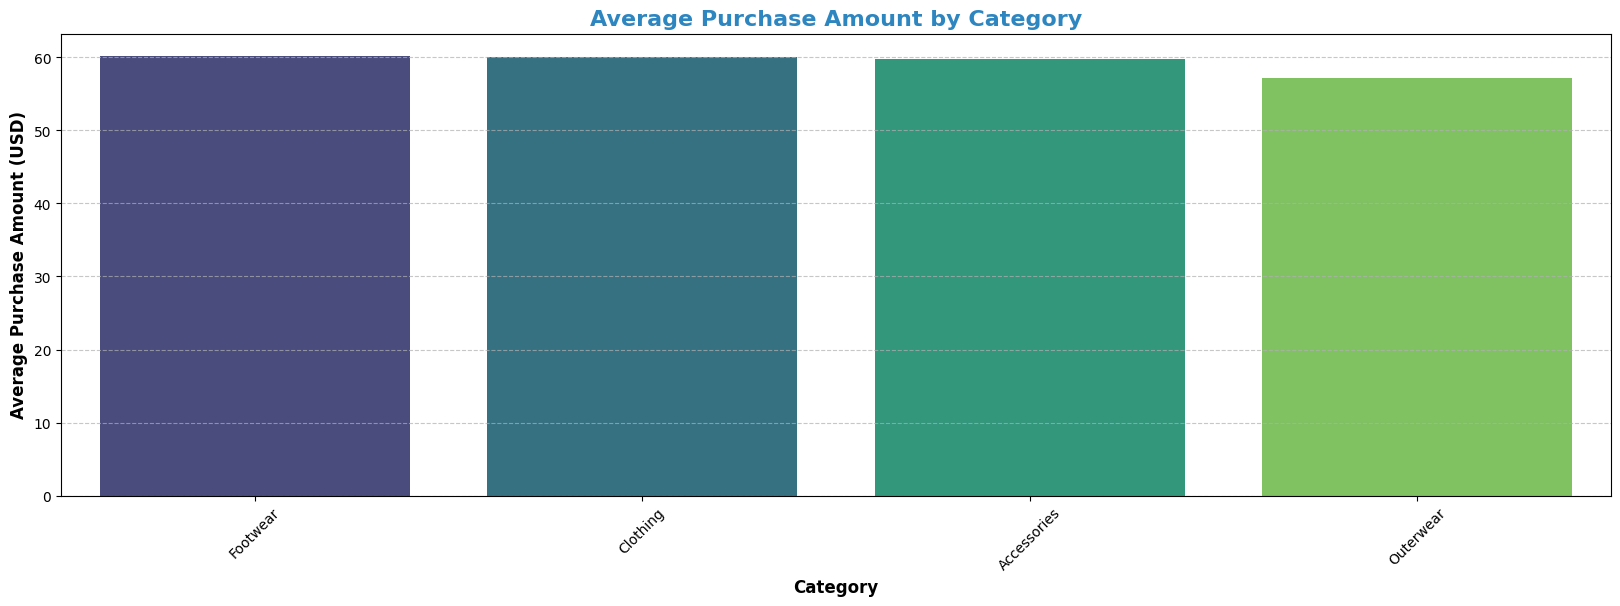

In [19]:
# Calculate average purchase amount for each category
avg_purchase_by_category = data.groupby('Category')['Purchase Amount (USD)'].mean().reset_index()

# Sort for better visualization
avg_purchase_by_category = avg_purchase_by_category.sort_values(by='Purchase Amount (USD)', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(20, 6))
# Changed 'Product_Category' to 'Category'
sns.barplot(data=avg_purchase_by_category, x='Category', y='Purchase Amount (USD)', palette='viridis')
plt.title('Average Purchase Amount by Category', fontsize=16, fontweight='bold', color='#2E86C1')
plt.xlabel('Category', fontsize=12, fontweight='bold')
plt.ylabel('Average Purchase Amount (USD)', fontsize=12, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

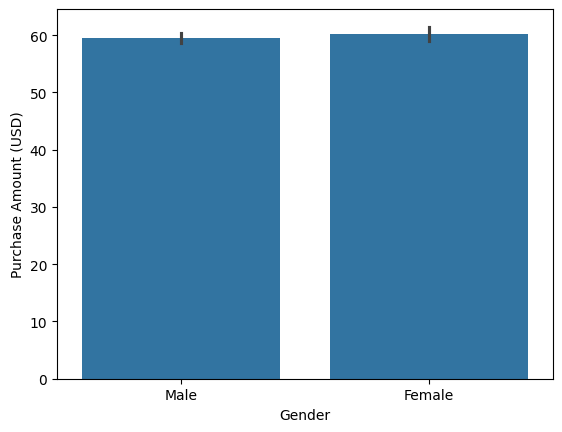

In [20]:
sns.barplot(data , x = 'Gender' , y = 'Purchase Amount (USD)')

The gender with the highest number of purchases is: Male with 2652 purchases.


<ipython-input-21-20e175aecd0f>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




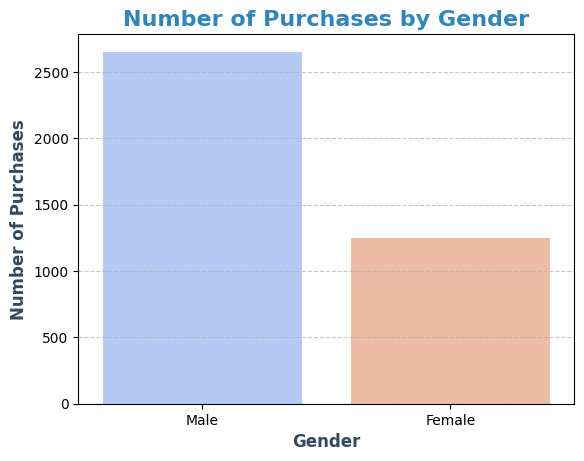

In [21]:
# Count the number of purchases by gender
gender_purchase_count = data['Gender'].value_counts()

# Determine the gender with the highest purchases
highest_gender = gender_purchase_count.idxmax()
highest_count = gender_purchase_count.max()

print(f"The gender with the highest number of purchases is: {highest_gender} with {highest_count} purchases.")

# Visualization
sns.barplot(x=gender_purchase_count.index, y=gender_purchase_count.values, palette='coolwarm')
plt.title('Number of Purchases by Gender', fontsize=16, fontweight='bold', color='#2E86C1')
plt.xlabel('Gender', fontsize=12, fontweight='bold', color='#34495E')
plt.ylabel('Number of Purchases', fontsize=12, fontweight='bold', color='#34495E')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Most commonly purchased items in each category:
      Category Item Purchased
0  Accessories        Jewelry
1     Clothing         Blouse
2     Footwear        Sandals
3    Outerwear         Jacket


<ipython-input-22-60aab34c20b3>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




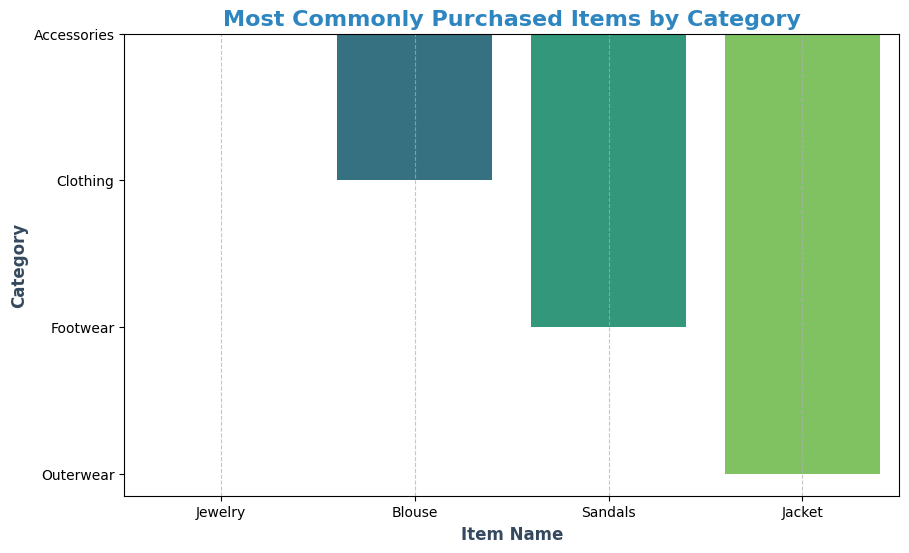

In [22]:
# Find the most commonly purchased items in each category
most_common_items = data.groupby('Category')['Item Purchased'].agg(lambda x: x.mode()[0]).reset_index()

# Display the result
print("Most commonly purchased items in each category:")
print(most_common_items)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=most_common_items, y='Category', x='Item Purchased', palette='viridis')
plt.title('Most Commonly Purchased Items by Category', fontsize=16, fontweight='bold', color='#2E86C1')
plt.xlabel('Item Name', fontsize=12, fontweight='bold', color='#34495E')
plt.ylabel('Category', fontsize=12, fontweight='bold', color='#34495E')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [23]:
fig = px.histogram(data , x = 'Item Purchased' , color = 'Category')
fig.show()

Average Rating by Category:
      Category  Review Rating
2     Footwear       3.790651
0  Accessories       3.768629
3    Outerwear       3.746914
1     Clothing       3.723143


<ipython-input-24-7a9c1140c170>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




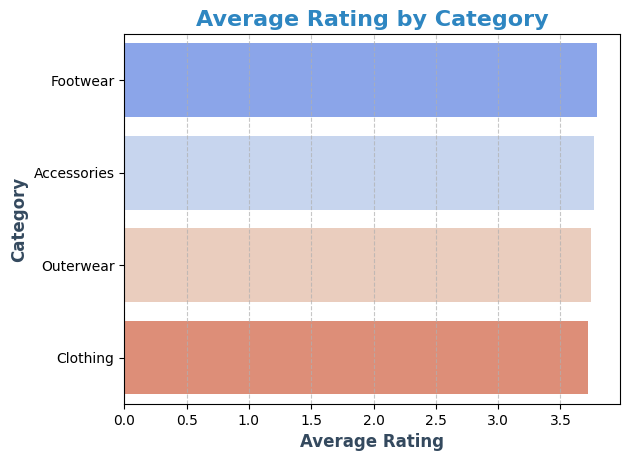

In [24]:
# Calculate the average rating for each product category
avg_rating_by_category = data.groupby('Category')['Review Rating'].mean().reset_index()

# Sort the data for better visualization
avg_rating_by_category = avg_rating_by_category.sort_values(by='Review Rating', ascending=False)

# Display the result
print("Average Rating by Category:")
print(avg_rating_by_category)

# Visualization
sns.barplot(data=avg_rating_by_category, x='Review Rating', y='Category', palette='coolwarm')
plt.title('Average Rating by Category', fontsize=16, fontweight='bold', color='#2E86C1')
plt.xlabel('Average Rating', fontsize=12, fontweight='bold', color='#34495E')
plt.ylabel('Category', fontsize=12, fontweight='bold', color='#34495E')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


Purchase Behavior Comparison:
  Subscription Status  Avg Purchase Amount (USD)  Avg Frequency of Purchases
0                  No                  59.865121                   17.292589
1                 Yes                  59.491928                   17.954416


<ipython-input-25-b1def03aa52f>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-25-b1def03aa52f>:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




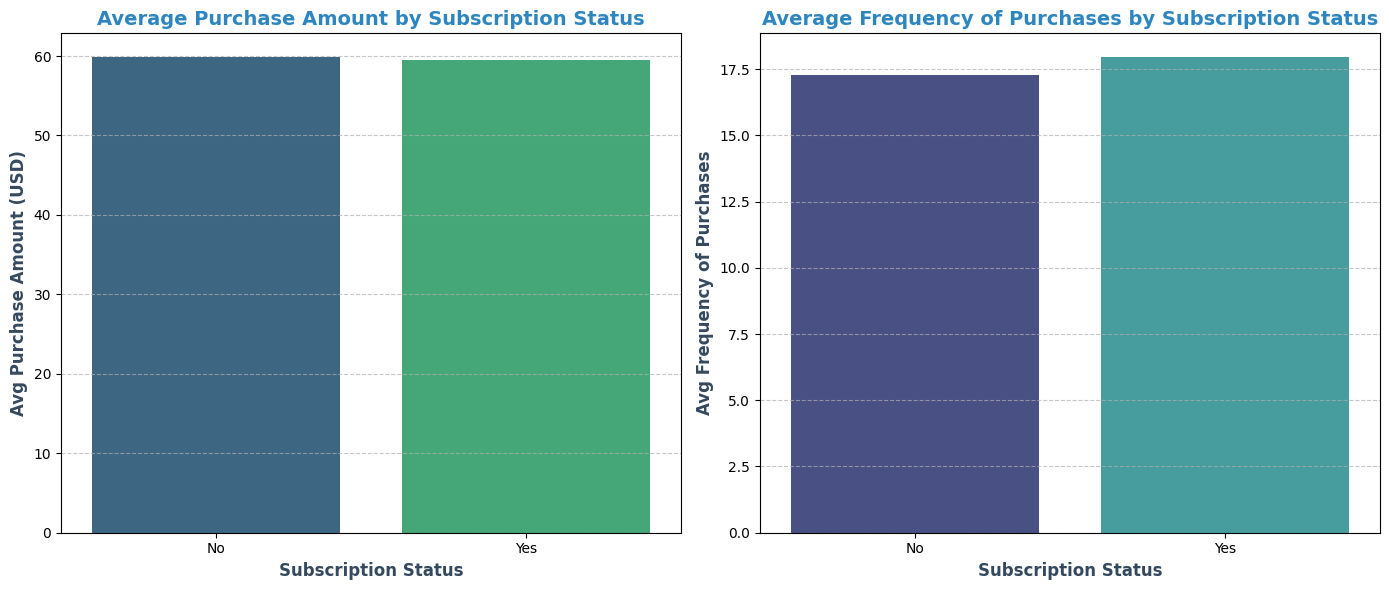

In [25]:
# Step 1: Create a mapping for frequency categories
frequency_mapping = {
    'Every 3 Months': 4,  # 4 times a year
    'Monthly': 12,        # 12 times a year
    'Fortnightly': 26,    # 26 times a year
    'Bi-Weekly': 26,      # 26 times a year
    'Weekly': 52,         # 52 times a year
    'Quarterly': 4,       # 4 times a year
    'Annually': 1         # 1 time a year
}

# Step 2: Map the 'Frequency of Purchases' to numeric values
data['Frequency of Purchases (Numeric)'] = data['Frequency of Purchases'].map(frequency_mapping)

# Step 3: Group by 'Subscription Status' and calculate the mean of relevant metrics
purchase_behavior = data.groupby('Subscription Status')[['Purchase Amount (USD)', 'Frequency of Purchases (Numeric)']].mean().reset_index()

# Step 4: Rename columns for better clarity
purchase_behavior.columns = ['Subscription Status', 'Avg Purchase Amount (USD)', 'Avg Frequency of Purchases']

# Step 5: Display results
print("Purchase Behavior Comparison:")
print(purchase_behavior)

# Step 6: Visualization
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot average purchase amount
sns.barplot(data=purchase_behavior, x='Subscription Status', y='Avg Purchase Amount (USD)', ax=ax[0], palette='viridis')
ax[0].set_title('Average Purchase Amount by Subscription Status', fontsize=14, fontweight='bold', color='#2E86C1')
ax[0].set_xlabel('Subscription Status', fontsize=12, fontweight='bold', color='#34495E')
ax[0].set_ylabel('Avg Purchase Amount (USD)', fontsize=12, fontweight='bold', color='#34495E')
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot average frequency of purchases
sns.barplot(data=purchase_behavior, x='Subscription Status', y='Avg Frequency of Purchases', ax=ax[1], palette='mako')
ax[1].set_title('Average Frequency of Purchases by Subscription Status', fontsize=14, fontweight='bold', color='#2E86C1')
ax[1].set_xlabel('Subscription Status', fontsize=12, fontweight='bold', color='#34495E')
ax[1].set_ylabel('Avg Frequency of Purchases', fontsize=12, fontweight='bold', color='#34495E')
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

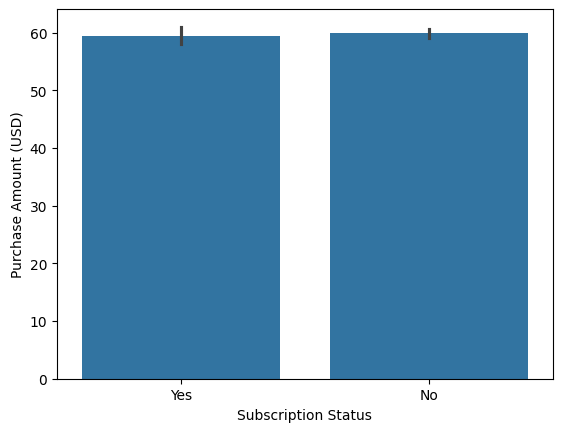

In [26]:
sns.barplot(data , x = 'Subscription Status' , y = 'Purchase Amount (USD)')

Most Popular Payment Method:
PayPal with 677 customers.


<ipython-input-27-5ad0c7e80ded>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




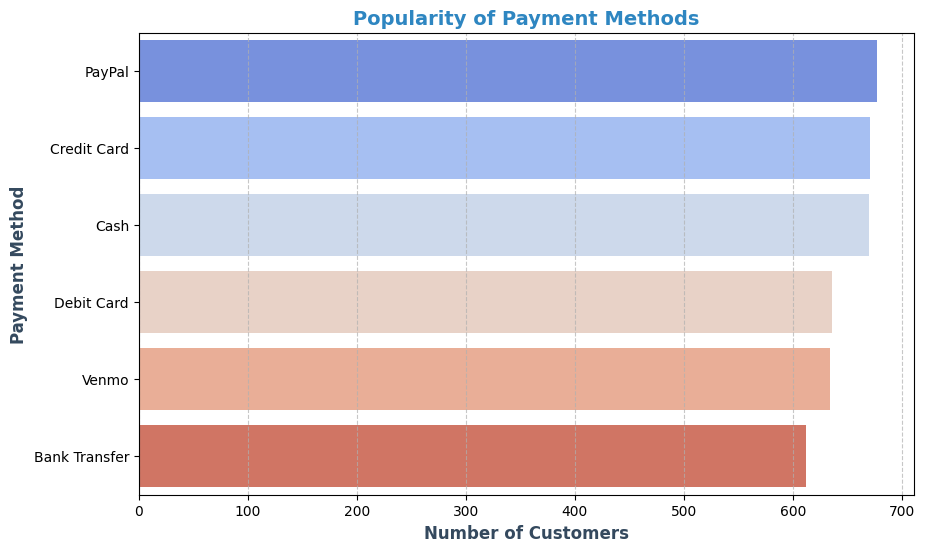

In [27]:
# Step 1: Count the occurrences of each payment method
payment_method_counts = data['Payment Method'].value_counts().reset_index()

# Step 2: Rename columns for better clarity
payment_method_counts.columns = ['Payment Method', 'Count']

# Step 3: Identify the most popular payment method
most_popular_payment_method = payment_method_counts.iloc[0]

# Step 4: Display results
print("Most Popular Payment Method:")
print(f"{most_popular_payment_method['Payment Method']} with {most_popular_payment_method['Count']} customers.")

# Step 5: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_method_counts, x='Count', y='Payment Method', palette='coolwarm')
plt.title('Popularity of Payment Methods', fontsize=14, fontweight='bold', color='#2E86C1')
plt.xlabel('Number of Customers', fontsize=12, fontweight='bold', color='#34495E')
plt.ylabel('Payment Method', fontsize=12, fontweight='bold', color='#34495E')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [28]:
data.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

data_groupby = data.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

fig = px.bar(data_groupby, x='Payment Method', y='Purchase Amount (USD)')
fig.show()


In [29]:
# Group by 'Age' and calculate the average frequency of purchases
age_group_purchase_frequency = data .groupby('Age')['Frequency of Purchases (Numeric)'].mean().reset_index()

# Visualization
fig = px.bar(
    age_group_purchase_frequency,
    x='Age',
    y='Frequency of Purchases (Numeric)',
    color='Age',  # Colorful bars for each age group
    title='Average Purchase Frequency Across Age Groups',
    text='Frequency of Purchases (Numeric)',  # Display frequency values on bars
    template='plotly_white'  # Clean and professional theme
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')  # Formats text nicely
fig.update_layout(
    xaxis_title='Age Groups',
    yaxis_title='Average Frequency of Purchases',
    title_x=0.5,  # Centers the title
    title_font=dict(size=18, color='darkblue'),  # Title styling
    font=dict(size=12)  # Overall font size
)
fig.show()


In [30]:
# Grouping data by Location to calculate average purchase amount
location_group = data.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

# Bar chart to visualize purchase behavior across locations
fig = px.bar(
    location_group,
    x='Location',
    y='Purchase Amount (USD)',
    title='Average Purchase Amount by Location',
    color='Location',  # Adding color to distinguish locations
    color_discrete_sequence=px.colors.qualitative.Pastel  # Soft, professional palette
)

# Update layout for aesthetics
fig.update_layout(
    title_font=dict(size=18, color='darkblue'),
    title_x=0.5,
    font=dict(size=12),
    xaxis_title='Location',
    yaxis_title='Average Purchase Amount (USD)',
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()


In [31]:
# Grouping by 'Discount Applied' to calculate total and average purchase amounts
discount_group = data.groupby('Discount Applied')['Purchase Amount (USD)'].mean().reset_index()

# Bar chart to visualize the effect of discounts on purchase amounts
fig = px.bar(
    discount_group,
    x='Discount Applied',
    y='Purchase Amount (USD)',
    title='Effect of Discounts on Purchase Amounts',
    color='Discount Applied',  # Highlight discount vs no discount
    color_discrete_sequence=['#2ECC71', '#E74C3C'],  # Green for Yes, Red for No
)

# Update layout for aesthetics
fig.update_layout(
    title_font=dict(size=18, color='darkblue'),
    title_x=0.5,
    font=dict(size=12),
    xaxis_title='Discount Applied',
    yaxis_title='Average Purchase Amount (USD)',
    margin=dict(t=50, l=25, r=25, b=25)
)

fig.show()


In [32]:
# Grouping by 'Gender' to calculate the average purchase amount
gender_group = data.groupby('Gender')['Purchase Amount (USD)'].mean().reset_index()

# Bar chart to visualize the difference
fig = px.bar(
    gender_group,
    x='Gender',
    y='Purchase Amount (USD)',
    title='Average Purchase Amount: Male vs Female Customers',
    color='Gender',  # Different colors for male and female
    color_discrete_sequence=['#3498DB', '#E91E63'],  # Blue for male, pink for female
)

# Update layout for better aesthetics
fig.update_layout(
    title_font=dict(size=18, color='darkblue'),
    title_x=0.5,
    font=dict(size=12),
    xaxis_title='Gender',
    yaxis_title='Average Purchase Amount (USD)',
    margin=dict(t=50, l=25, r=25, b=25),
    showlegend=False  # No need for a legend since Gender is already on the x-axis
)

fig.show()
